# ECE 20875 Project

#### Student names:
    *1- Mohmmad Alwakeel*
    *2- Faisal Alkishi* 

#### Purdue username:
    *1- malwake* 
    *2- falkishi*

#### PUID:
    *1- 0031509371*
    *2- 0031883032*

## path 1: Bike traffic




### Introduction:

   In path 1, the data gives information on bike traffic across several bridges in New York City. The data are provided in a CSV file that consists of 10 columns and 214 rows. The columns tell row data about the traffic each day, where each row provides the following raw data: Date/Day, Precipitation, Max and Min temperature in F, traffic in each bridge, and the total traffic.
Our analysis started with understanding the shape and values of the given data and then cleaning and wrangling the data to answer the analysis questions.

In [629]:
# Cleaning and wrangling the data

In [795]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import math
import re

In [659]:
#import CSV file using Pandas
data = pd.read_csv('NYC_Bicycle_Counts_2016_Corrected.csv')

In [660]:
# understand the shape of the data
data.describe()

,High Temp (°F),Low Temp (°F)
count,214.000000,214.000000
mean,74.933645,61.972430
std,12.545418,11.670566
min,39.900000,26.100000
25%,66.050000,53.225000
50%,78.100000,64.900000
75%,84.900000,71.100000
max,96.100000,82.000000


In [661]:
# understand the shape of the data
data.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,1-Apr,Friday,78.1,66.0,0.01,"1,704","3,126","4,115","2,552","11,497"
1,2-Apr,Saturday,55.0,48.9,0.15,827,"1,646","2,565","1,884","6,922"
2,3-Apr,Sunday,39.9,34.0,0.09,526,"1,232","1,695","1,306","4,759"
3,4-Apr,Monday,44.1,33.1,0.47 (S),521,"1,067","1,440","1,307","4,335"
4,5-Apr,Tuesday,42.1,26.1,0,"1,416","2,617","3,081","2,357","9,471"


In [662]:
# rename columns for convenience
data = data.rename(columns={"Brooklyn Bridge":"Brooklyn","Manhattan Bridge":"Manhattan","Williamsburg Bridge":"Williamsburg","Queensboro Bridge":"Queensboro","High Temp (°F)":"High_F","Low Temp (°F)":"Low_F"})

In [663]:
# First step to turn values into floats and integers
# getting rid of commas in values
data.Brooklyn = [i.replace(",","") for i in data.Brooklyn]
data.Manhattan = [i.replace(",","") for i in data.Manhattan]
data.Williamsburg = [i.replace(",","") for i in data.Williamsburg]
data.Queensboro = [i.replace(",","") for i in data.Queensboro]
data.Total = [i.replace(",","") for i in data.Total]

In [664]:
# remove non floats
def only_num(data):
    filter = re.compile(r'[^\d.]+')
    filtered = []
    for i in data:
        temp = filter.sub('', i)
        if temp == '':
            temp = None
        filtered.append(temp)
    return filtered

In [665]:
# remove non floats from the Precipitation column
data.Precipitation = only_num(data.Precipitation)

In [666]:
# drop empty rows
for i in range(len(data.Precipitation)):
    if data.Precipitation[i] is None:
        data = data.drop([i])

In [667]:
# understand the shape of the data
data.describe()

,High_F,Low_F
count,196.00000,196.000000
mean,74.67500,61.597449
std,12.68469,11.804616
min,39.90000,26.100000
25%,66.00000,53.100000
50%,77.00000,64.900000
75%,84.90000,70.275000
max,96.10000,82.000000


In [669]:
data.head()

,Date,Day,High_F,Low_F,Precipitation,Brooklyn,Manhattan,Williamsburg,Queensboro,Total
0,1-Apr,Friday,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,2-Apr,Saturday,55.0,48.9,0.15,827,1646,2565,1884,6922
2,3-Apr,Sunday,39.9,34.0,0.09,526,1232,1695,1306,4759
3,4-Apr,Monday,44.1,33.1,0.47,521,1067,1440,1307,4335
4,5-Apr,Tuesday,42.1,26.1,0,1416,2617,3081,2357,9471


A section (or more) describing the results of each analysis, and what your answers to the questions are based on your results. Visual aids are helpful here, if necessary to back up your conclusions. Note that it is OK if you do not get "positive" answers from your analysis, but you must explain why that might be.

### Analysis:

After cleaning the data, we are ready now to answer the following questions:

**1 - You want to install sensors on the bridges to estimate overall traffic across all the bridges. But you only have enough budget to install sensors on three of the four bridges. Which bridges should you install the sensors on to get the best prediction of overall traffic?**

Since we were given the data of the traffic on each bridge and the total traffic, we decided to analyze the data to find the representation of every three bridges from the total traffic. Therefore, we will use the mean of the traffic representation of every three bridges of each day.
    
    
    
**2- The city administration is cracking down on helmet laws, and wants to deploy police officers on days with high traffic to hand out citations. Can they use the next day's weather forecast to predict the number of bicyclists that day?**

We assume logically that the precipitation rate would affect the traffic on bridges. To confirm that hypothesis, we will investigate two methods. The first is linear regression, where we will examine 5-degree polynomials models based on our independent variable and try to look for a pattern on the graph. Moreover, we will use linear regression to find MSE and R squared values at best-fit lamda based on the founded model. 
    
**3- Can you use this data to predict whether it is raining based on the number of bicyclists on the bridges?**

Rationally, flipping the access doesn't make sense. We know that a precipitation rate will affect someone's decision in leaving the house or stay. Nevertheless, People in the streets can only have a butterfly effect on the perception rate. Henceforth, we will test two regression models. The first is linear regression, where will follow the same procedure as question two. Furthermore, we will use random forest regression, where we will use the MSE and R squared values to interpret our final answer regarding the representation and effect of traffic on precipitation rates. The regression model will take into account the four bridges (independent variable) and precipitation rate (dependent variable) to reveal the results.

## Problem 1:

In here, we will find the representation of every three bridges from the total traffic.

In [670]:
# Turning columns values into floats
def turn_float(data):
    calc = []
    for i in data:
        temp = []
        for j in i:
            temp.append(float(j))
        calc.append(temp)
    return calc

In [671]:
# Combining all briges in one column and turning variables' types into floats

# # of bridges
Num_of_bridges = 4

# Total representation
bridges = [data.Brooklyn, data.Manhattan,data.Williamsburg , data.Queensboro]
bridges = np.array(bridges)
total = np.array(data.Total)
#print(bridges)
bridges_calc = turn_float(bridges)
total_calc = []
#for i in bridges:
 #   temp = []
  #  for j in i:
   #     temp.append(float(j))
    #bridges_calc.append(temp)
    
for j in total:
    total_calc.append(float(j))
    


In [672]:
# Find the representation
def representation(bridges,total,Num_of_bridges):
    total_rep = []
    for i in range(Num_of_bridges):
        #i = 0 => Brooklyn, Manhattan, Williamsburg
        #i = 1 => Manhattan, Williamsburg, Queensboro
        if i < 2:
            temp = np.array(bridges[i]) + np.array(bridges[i+1]) + np.array(bridges[i+2])
            temp = temp/np.array(total)
        #i = 2 => Brooklyn, Williamsburg, Queensboro
        elif i == 2:
            temp =  np.array(bridges[i]) + np.array(bridges[i-2]) + np.array(bridges[i+1])
            temp = temp/np.array(total)
        #i = 3 => Brooklyn, Manhattan, Queensboro
        else:
            temp =  np.array(bridges[i]) + np.array(bridges[i-2]) + np.array(bridges[i-3])
            temp = temp/np.array(total)
        total_rep.append(temp)
    return total_rep

In [673]:
#total representation
total_rep = representation(bridges_calc,total_calc,Num_of_bridges);

#total representation mean
mean_rep = [np.mean(i) for i in total_rep]
print(mean_rep)

[0.7645454300787278, 0.8396983345390486, 0.7295617094534255, 0.6661945259287985]


#### Final results:

In [684]:
print("Brooklyn, Manhattan, and Williamsburg bridges represent {:.2f}% \n".format(mean_rep[0]*100))

print("Manhattan, Williamsburg, Queensboro bridges have the highest representation of {:.2f}% \n".format(mean_rep[1]*100))

print("Brooklyn, Williamsburg, Queensboro bridges represent {:.2f}% \n".format(mean_rep[2]*100))

print("Brooklyn, Manhattan, Queensboro bridges represent {:.2f}%\n".format(mean_rep[3]*100))

print("\nTherefore, the bridge to be omitted is: Brooklyn bridge")


Brooklyn, Manhattan, and Williamsburg bridges represent 76.45% 

Manhattan, Williamsburg, Queensboro bridges have the highest representation of 83.97% 

Brooklyn, Williamsburg, Queensboro bridges represent 72.96% 

Brooklyn, Manhattan, Queensboro bridges represent 66.62%


Therefore, the bridge to be omitted is: Brooklyn bridge


## Problem2:

First, we will examine 5-degree polynomials models based on our independent variable and try to look for a pattern on the graph.

In [686]:
x = np.array(data.Precipitation)
y = np.array(data.Total)
x = [float(u) for u in x]
y = [float(u) for u in y]

In [685]:
# Intoduce the functions for polynomial degree representation
def Polyfit(X,Y, degrees):
    paramFits = []
    y_1 = []
    y_2 = []
    y_3 = []
    y_4 = []
    y_5 = []
        
    for j in degrees:
        mitrx = feature_matrix(X, j)
        ##matrix
        paramFits.append(least_squares(mitrx, Y))
        
    xsort = sorted(X)
    
    for l in sorted(X):
        res1 = paramFits[0][0] * l + paramFits[0][1]
        res2 = paramFits[1][0] * (l ** 2) + paramFits[1][1] * l + paramFits[1][2]
        res3 = paramFits[2][0] * (l ** 3) + paramFits[2][1] * (l ** 2) + paramFits[2][2] * l + paramFits[2][3]
        res4 = paramFits[3][0] * (l ** 4) + paramFits[3][1] * (l ** 3) + paramFits[3][2] * (l ** 2) + paramFits[3][3] * l + paramFits[3][4]
        res5 = paramFits[4][0] * (l ** 5) + paramFits[4][1] * (l ** 4) + paramFits[4][2] * (l ** 3) + paramFits[4][3] * (l ** 2) + paramFits[4][4] * l + paramFits[4][5]
        y_1.append(res1)
        y_2.append(res2)
        y_3.append(res3)
        y_4.append(res4)
        y_5.append(res5)
            
    plt.scatter(X, Y, color='b', marker='*')
    
    plt.plot(sorted(X), y_1, color='g', linestyle='-.')
    plt.plot(sorted(X), y_2, color='b', linestyle='-.')
    plt.plot(sorted(X), y_3, color='m', linestyle='-.')
    plt.plot(sorted(X), y_4, color='y', linestyle='-.')
    plt.plot(sorted(X), y_5, color='r', linestyle='-.')
    
    plt.legend(["data = 1", "data = 2", "data = 3", "data = 4", "data = 5", "Path Data"], loc='upper right')
    plt.ylabel("Y Data")
    plt.xlabel("X Data")
 
    plt.show()
    ##
    return paramFits

def feature_matrix(x, d):
    # fill in
    # There are several ways to write this function. The most efficient would be a nested list comprehension
    # which for each sample in x calculates x^d, x^(d-1), ..., x^0.
    X_list = []
    ind = 0
    for i in x:
        d1 = d
        
        X_list.append([])
        
        while d1 >= 0:
            X_list[ind].append(i**d1)
            d1 -= 1
            #d = 1    
        ind += 1
    return X_list


# Return the least squares solution based on the feature matrix X and corresponding target variable samples in y.
# Input: X as a list of features for each sample, and y as a list of target variable samples.
# Output: B, a list of the fitted model parameters based on the least squares solution.
def least_squares(X, y):
    X_array = np.array(X)
    # X_array = list(X)
    Y_array = np.array(y)

    # fill in
    # Use the matrix algebra functions in numpy to solve the least squares equations. This can be done in just one line.
    
    return (np.linalg.inv(X_array.T @ X_array)) @ (X_array.T @ Y_array)

In [691]:
# Find best fit lamda
def linearregression(X,y):
    #Importing dataset
    [X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.25, random_state=101)

    X_train = X_train_norm
    X_test = X_test_norm

    lmbda = np.logspace(0, 3,endpoint = True) #fill in

    MODEL = []
    MSE = []
    for l in lmbda:
        #Train the regression model using a regularization parameter of l
        model = train_model(X_train,y_train,l)

        #Evaluate the MSE on the test set
        mse = error(X_test,y_test,model)

        #Store the model and mse in lists for further processing
        MODEL.append(model)
        MSE.append(mse)

    #Plot the MSE as a function of lmbda
    plt.plot(lmbda, MSE) #fill in
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.title('MSE as a function of Lambda')
    plt.show()

    #Find best value of lmbda in terms of MSE
    ind = MSE.index(min(MSE))
    #fill in
    [lmda_best,MSE_best,model_best] = [lmbda[ind],MSE[ind],MODEL[ind]]

    print('Best lambda tested is ' + str(lmda_best) + ', which yields an MSE of ' + str(MSE_best))

    return model_best

def normalize_train(X_train):

    X = []
    mean = []
    std = []
    #count = 0
    for i in range(len(X_train)):
        k = X_train[i]
        col = k
        mean1 = col.mean()
        std1 = np.std(col)
        mean.append(col.mean())
        std.append(np.std(col))
        x1 = []
        for j in col:
            new = (j - mean1) / std1
            x1.append(new)  
        X.append(x1)

    return np.array(X).T, mean, std

def normalize_test(X_test, trn_mean, trn_std):

    #fill in
    X = []
    x1 = []
    for i in range(len(X_test)):
        k = X_test[i]
        col = k
        mean = trn_mean[i]
        std = trn_std[i]
        x1 = []
        for j in col:
            new = (j - mean) / std
            x1.append(new)  
        X.append(x1)


    return np.array(X).T

def train_model(X,y,l):
    model = linear_model.Ridge(alpha = l, fit_intercept = True)
    model.fit(X, y)

    return model

def error(X,y,model):

    y_pred_test = model.predict(X)
    mse = mean_squared_error(y, y_pred_test)
    #y_pred = (model * std_y) + mean_y
    return(mse)

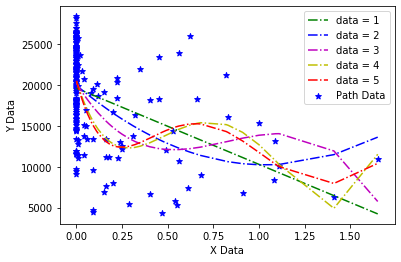

In [687]:
degrees = [1, 2, 3, 4, 5]
paramFits = Polyfit(x,y, degrees)

 The five-degree polynomials models don't fit the raw data. Hence, let's check the MSE and R squared values to check whether precipitation rates predict/interpret traffic on bridges.

In [751]:
x = np.array(data.Precipitation)
y = np.array(data.Total)
x = [[float(u)] for u in x]
y = [[float(u)] for u in y]

Mean squared error: 26552221.57
Coefficient of determination: 0.23


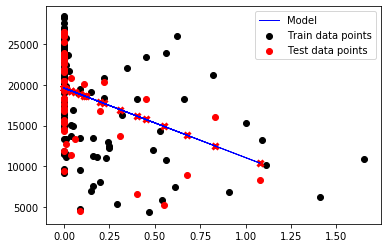

In [754]:
# at defult lambda
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

y_pred_test = regr.predict(X_test)

print('Mean squared error: %.2f'
 % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
 % r2_score(y_test, y_pred_test))

plt.scatter(X_train, y_train, color='black', label='Train data points')
plt.scatter(X_test, y_test, color='red', label='Test data points')
plt.plot(X_test, y_pred_test, color='blue', linewidth=1, label='Model')
plt.scatter(X_test, y_pred_test, marker='x', color='red', linewidth=3)
plt.legend()
plt.show()

The MSE and R squared results show poor representation. Therefore, we say that the city administration can't rely on next-day traffic estimation by checking the forecast. Furthermore, the given data have a high number of outliers which makes it difficult for linear regression to predict the result.

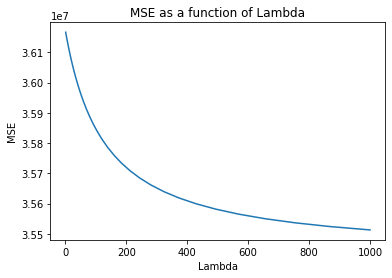

Best lambda tested is 1000.0, which yields an MSE of 35512659.98294826
[[48.82463029]]
[18471.24489796]


In [693]:
# check if best fit lamba < 1000

model_best = linearregression(x,y)

print(model_best.coef_)
print(model_best.intercept_)


The best fit model uses lambda > 1000. Therefore, we ignore this result and stick to the previous result, which still tells that the city administration can't rely on next-day traffic estimation by checking the forecast

## Problem 3:

First, we will examine 5-degree polynomials models based on our independent variable and try to look for a pattern on the graph.

In [695]:
y_flip = np.array(data.Precipitation)
x_flip = np.array(data.Total)
y_flip = [float(u) for u in y_flip]
x_flip = [float(u) for u in x_flip]

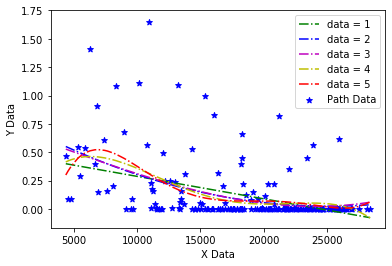

In [696]:
degrees = [1, 2, 3, 4, 5]
paramFits_flip = Polyfit(x_flip,y_flip, degrees)

 The five-degree polynomials models don't fit the raw data. Hence, let's check the MSE and R squared values to check whether precipitation rates predict/interpret traffic on bridges.

In [698]:
y_flip = np.array(data.Precipitation)
x_flip = np.array(data.Total)
y_flip = [[float(u)] for u in y_flip]
x_flip = [[float(u)] for u in x_flip]

Mean squared error: 0.04
Coefficient of determination: 0.25


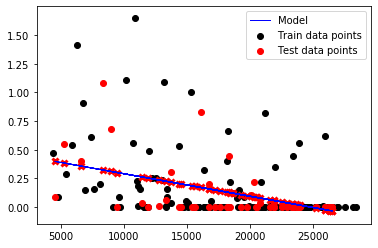

In [699]:
# defult lamda
X_train, X_test, y_train, y_test = train_test_split(x_flip, y_flip, random_state=0)
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

y_pred_test = regr.predict(X_test)

print('Mean squared error: %.2f'
 % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
 % r2_score(y_test, y_pred_test))

plt.scatter(X_train, y_train, color='black', label='Train data points')
plt.scatter(X_test, y_test, color='red', label='Test data points')
plt.plot(X_test, y_pred_test, color='blue', linewidth=1, label='Model')
plt.scatter(X_test, y_pred_test, marker='x', color='red', linewidth=3)
plt.legend()
plt.show()

The MSE and R squared results show inaccurate results. The coefficient of determination provides a low score. On the other hand, MSE shows a very low score (High representation). Therefore, we will further investigate with the best fit lambda and then use the forest random regression model.

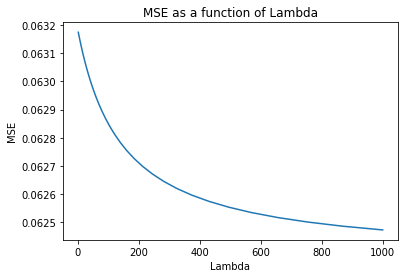

Best lambda tested is 1000.0, which yields an MSE of 0.06247271363444927
[[-0.00059043]]
[0.11517007]


In [700]:
# check if best fit lamba < 1000

model_best = linearregression(x_flip,y_flip)

print(model_best.coef_)
print(model_best.intercept_)

The best fit model uses lambda > 1000. Therefore, we ignore this result and the previous result and apply the forest random regression model.

In [842]:
# Prepering the columns and values to create the model
brooklyn_bridge = data.Brooklyn.to_list()
queensboro_bridge = data.Queensboro.to_list()
Williamsburg_bridge = data.Williamsburg.to_list()
manhattan_bridge = data.Manhattan.to_list()

#Turning strings into floats
brooklyn_bridge = [float(i) for i in brooklyn_bridge]
queensboro_bridge = [float(i) for i in queensboro_bridge]
Williamsburg_bridge = [float(i) for i in Williamsburg_bridge]
manhattan_bridge = [float(i) for i in manhattan_bridge]

# Creating our dependent variable for the model
bridges_forest = []
for i in range(len(brooklyn)):
    bridges_forest.append([brooklyn_bridge[i],queensboro_bridge[i],Williamsburg_bridge[i],manhattan_bridge[i]])
    
bridges_forest = [[np.sum(i)] for i in bridges_forest]

In [843]:
# dependent and independant variables
x_forest = np.array(bridges_forest)
y_forest = np.array(data.Precipitation)

y_forest = [[float(u)] for u in y_forest]
y_forest = pd.DataFrame(data=y_forest)
#x_forest = x_forest.astype('int')
x_forest = pd.DataFrame(data=x_forest)

In [850]:
#normulize and generate predicted y based on the regression model
X_train, X_test, y_train, y_test = train_test_split(x_forest, y_forest, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squared error: 0.08
Coefficient of determination: -0.42


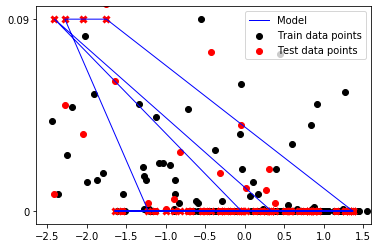

In [851]:
#Printing and plotting the result
print('Mean squared error: %.2f'
 % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
 % r2_score(y_test, y_pred))

plt.scatter(X_train, y_train, color='black', label='Train data points')
plt.scatter(X_test, y_test, color='red', label='Test data points')
plt.plot(X_test, y_pred_test, color='blue', linewidth=1, label='Model')
plt.scatter(X_test, y_pred_test, marker='x', color='red', linewidth=3)
plt.legend()
plt.show()

In conclusion, based on the analysis parameters and plots, we can interfere that bike traffic prediction is not dependent on precipitation rate and may not be predicted based on the given x value. In addition, using the mean is a better estimation. The random forest regression model explained and proved our previous rational assumption.